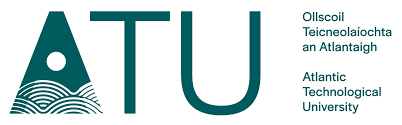

# Programming for Data Analysis Assignment 2022

***

### Eleanor Sammon, Student # G00411277


## Table of Contents

1. [Introduction](#introduction)
2. [Synthetic Data](#synthetic_data)
3. [Variables](#variables)
4. [Coding the Dataset](#dataset)
5. [Testing the Dataset](#testing)
6. [Conclusion](#conclusion)
7. [References](#references)


## 1. Introduction  <a class="anchor" id="introduction"></a>

The purpose of this project is to synthesise a dataset using data points from a real life phenomenon. 

Having first outlined the pros and cons of synthetic data, I will then synthesise my own data-set which will model the relationship, if any, between age, sex, social class, education and the tendancy towards cigarette smoking. I will outline each of the variables, code a synthetic set of data points for each variable based on real data and perform analysis on the resulting composite data set. 


## 2. Synthetic Data  <a class="anchor" id="synthetic_data"></a>

Synthetic data is artificially generated data that models real data.  

The main advantages of synthetic data are:
    
- **It is easy to generate and use**  Collecting and collating real-world data can be time consuming and raise privacy and data protection issues. Synthetic data is cleaner and doesn’t have the inaccuracies, duplicates or formatting niggles that often come with real data.

- **Its of superior quality**  Real-world data can be time-consuming to collect and collate, it may be missing values, contain inaccuracies or be biased.  Synthetic data is cheaper, faster, has more accurate patterns, is balanced, unbiased, and high quality.

- **It scales well**  Successfully training a predictive model works best with large scale inputs.

- **It has no security, moral or regulatory conflicts** Even where real-world data exists in sufficient quantities it can often be ring-fenced because of compliance issues. General Data Protection Regulation (GDPR) forbids uses of data that weren't explicitly consented to at the time of collection. 


Disadvantages of synthetic data include:
    
- **Bias** The quality of the synthesised output correlates directly to the quality of the input and where there is bias in the input it will be reflected and potentially amplified in the synthesised data with potential for false insights and poor decision-making. 

- **Ignoring outliers** Synthetic data approximates real-world data, it can never really replicate it entirely and therefore outliers which maybe appear in real-world, organic data could be ignored or overlooked in a synthesised data set.  Such outliers can be significant in themselves.

- **Improper use and application** Even synthetic data has to be founded in fact and there are concerns that the underlying real data, which could be sensitive, may still be identifiable to its source.  A synthesised dataset must be carefully aligned to the original problem to ensure it's fulfilling its purpose.


## 3. Variables <a class="anchor" id="variables"></a>

I know someone recently diagnosed with stage 4 lung cancer so I decided to synthesise a data set looking at whether certain societal factors might influence whether a person is more likely to be a smoker. My four variables are age, smoker, social class and education. 

### 3.1 Age
The data for smoking statistics I am using is taken from the [Healthy Ireland Survey 2021](https://www.gov.ie/en/publication/9ef45-the-healthy-ireland-survey-2021/).  It looks at smokers in the age range from 15 to 65+ so on this basis I will generate an array of 1000 random ages from the age of 15.  The average [life expectancy](https://www.worlddata.info/europe/ireland/index.php) in Ireland in 2020 was 82.2 years so I have used this as the upper parameter of my array.

In [1]:
# import the necessary libraries to run the code and perform analysis
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt


In [2]:
## generate a random array of 1000 ages between 15 and 82
Age = np.random.randint(low=15, high=82, size=1000) 

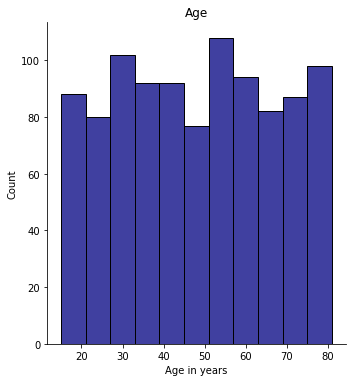

In [3]:
sns.displot(Age, color = 'navy')
plt.title('Age')
plt.xlabel('Age in years')
plt.show()


In [4]:
np.mean(Age)

47.758

A cursory check of the mean reveals that it is significantly higher than the actual mean age of the Irish population.  This is because my array starts at 15 which is not reflective of the actual population.  To try and correct this I found a solution on [Stack Overflow](https://stackoverflow.com/questions/49855569/how-to-generate-random-numbers-to-satisfy-a-specific-mean-and-median-in-python) which suggested generating two separate random ranges of length 500 within the desired range and which more accurately represent the population mean age.

In [5]:
arr1 = np.random.randint(15, 28, 1000)    
arr2 = np.random.randint(30, 82, 1000)

np.mean(np.concatenate((arr1, arr2)))

37.9255

Therefore, my new array is comprised of two arrays, satisfying my desired parameters. 

In [6]:
Age = arr1+arr2

For the purposes of correlating the smoking statistics with the relevant ages and for the sake of accuracy, I will group these ages into evaluation bins in my dataframe that correspond with age brackets in the [Healthy Ireland survey](https://www.gov.ie/en/publication/9ef45-the-healthy-ireland-survey-2021/#).

### 3.2 Smoking
Lung cancer is the biggest cancer killer worldwide and is the fourth most common cancer in Ireland after prostate, breast and colorectal with about 2,690 cases diagnosed with lung cancer annually.  The incidence of lung cancer is currently decreasing for men but increasing for women.  The majority of people who get lung cancer are over the age of 50.  Smoking avoidance/cessation is the most important preventative strategy as over 90% of lung cancer can be attributed to cigarette smoke.

According to the [Healthy Ireland survey](https://www.gov.ie/en/publication/9ef45-the-healthy-ireland-survey-2021/#), 18% of the Irish population are currently smokers (daily and occasionally).  This represents a reduction of 5% since 2015 when the prevalence of smokers was 23%.  

The World Health Organisation statistics put the % of the global population of smokers at 22.3% (2020) and says 
> _"The economic costs of tobacco use are substantial and include significant health care costs for treating the diseases caused by tobacco use as well as the lost human capital that results from tobacco-attributable morbidity and mortality."_<

The WHO also point to the fact that over 80% of the world's 1.3 billion tobacco users live in low- and middle-income countries.  
<br/>
<div>
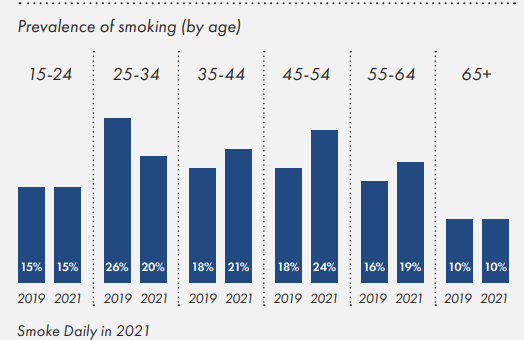
</div>
<br/>


Whether someone is a smoker or not is a discrete probability distribution – a binomial distribution – which captures variables with two possible outcomes.  In this instance, the probability is not 50/50 of being a smoker/non-smoker as we know 18% smoke, 82% don't.  Therefore in my database I have generated random variables with the probability distribution built in both according to the proportion of smokers/non-smokers in the population but also broken down by age group as some age groups are more likely than others to be smokers.

### 3.3 Social Class
The Irish population is classified into one of seven social class groups which are ranked on the basis of occupation, thereby bringing together people with similar levels of occupational skill.  According to the [2016 Census of Ireland](https://www.cso.ie/en/media/csoie/newsevents/documents/census2016summaryresultspart2/Chapter_6_Socio-economic_group_and_social_class.pdf), being the most recent complete data set available, the following is the breakdown of the population by social class:

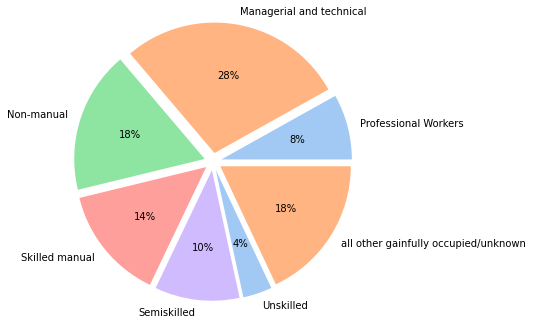

In [7]:
# % values for each social class category
values = np.array([8.1, 28.1, 17.6, 14.1, 10.5, 3.6, 18])
myexplode = [0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1, 0.1]
mylabels = ['Professional Workers', 'Managerial and technical', 
            'Non-manual', 'Skilled manual', 'Semiskilled', 
            'Unskilled', 'all other gainfully occupied/unknown']
colors = sns.color_palette('pastel')[0:5]

#create pie chart with % values
plt.pie(values, explode=myexplode, labels = mylabels, colors = colors, autopct='%.0f%%', radius = 1.5)
plt.show()

Weighted distributions specify the probabilities of events based on observed and recorded data and for the purposes of this assignment, both social class and education are synthesised using weighted distributions to reflect the data as observed in the real world.  In both instances the underlying data points were drawn from the CSO 2016 Census, being the most recent complete set of data.

### 3.4 Education


The [CSO Website](https://data.cso.ie/table/EA005) has a useful interactive table which gives information about the highest levels of education amongst the Irish population for both 2011 and 2016 Census.  I have used the most recent complete set of data, being the 2016 Census. 

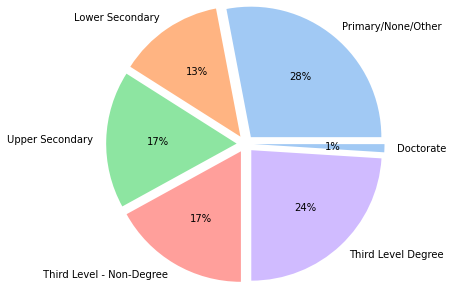

In [8]:
# % values for each education category
education = np.array([28, 13, 17, 17, 24, 1])
cats = ['Primary/None/Other', 'Lower Secondary', 'Upper Secondary',' Third Level - Non-Degree', 'Third Level Degree', 'Doctorate' ]
myexplode = [0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1]
colors = sns.color_palette('pastel')[0:5]

#create pie chart with % values
plt.pie(education, explode=myexplode, labels = cats, colors = colors, autopct='%.0f%%', radius = 1.5)

plt.show()

I decided to use this more detailed breakdown by age groups to better model whether there is any correlation between age, education and a tendency to smoke or not. I used the following probability table extrapolated from the CSO data. 

<div>
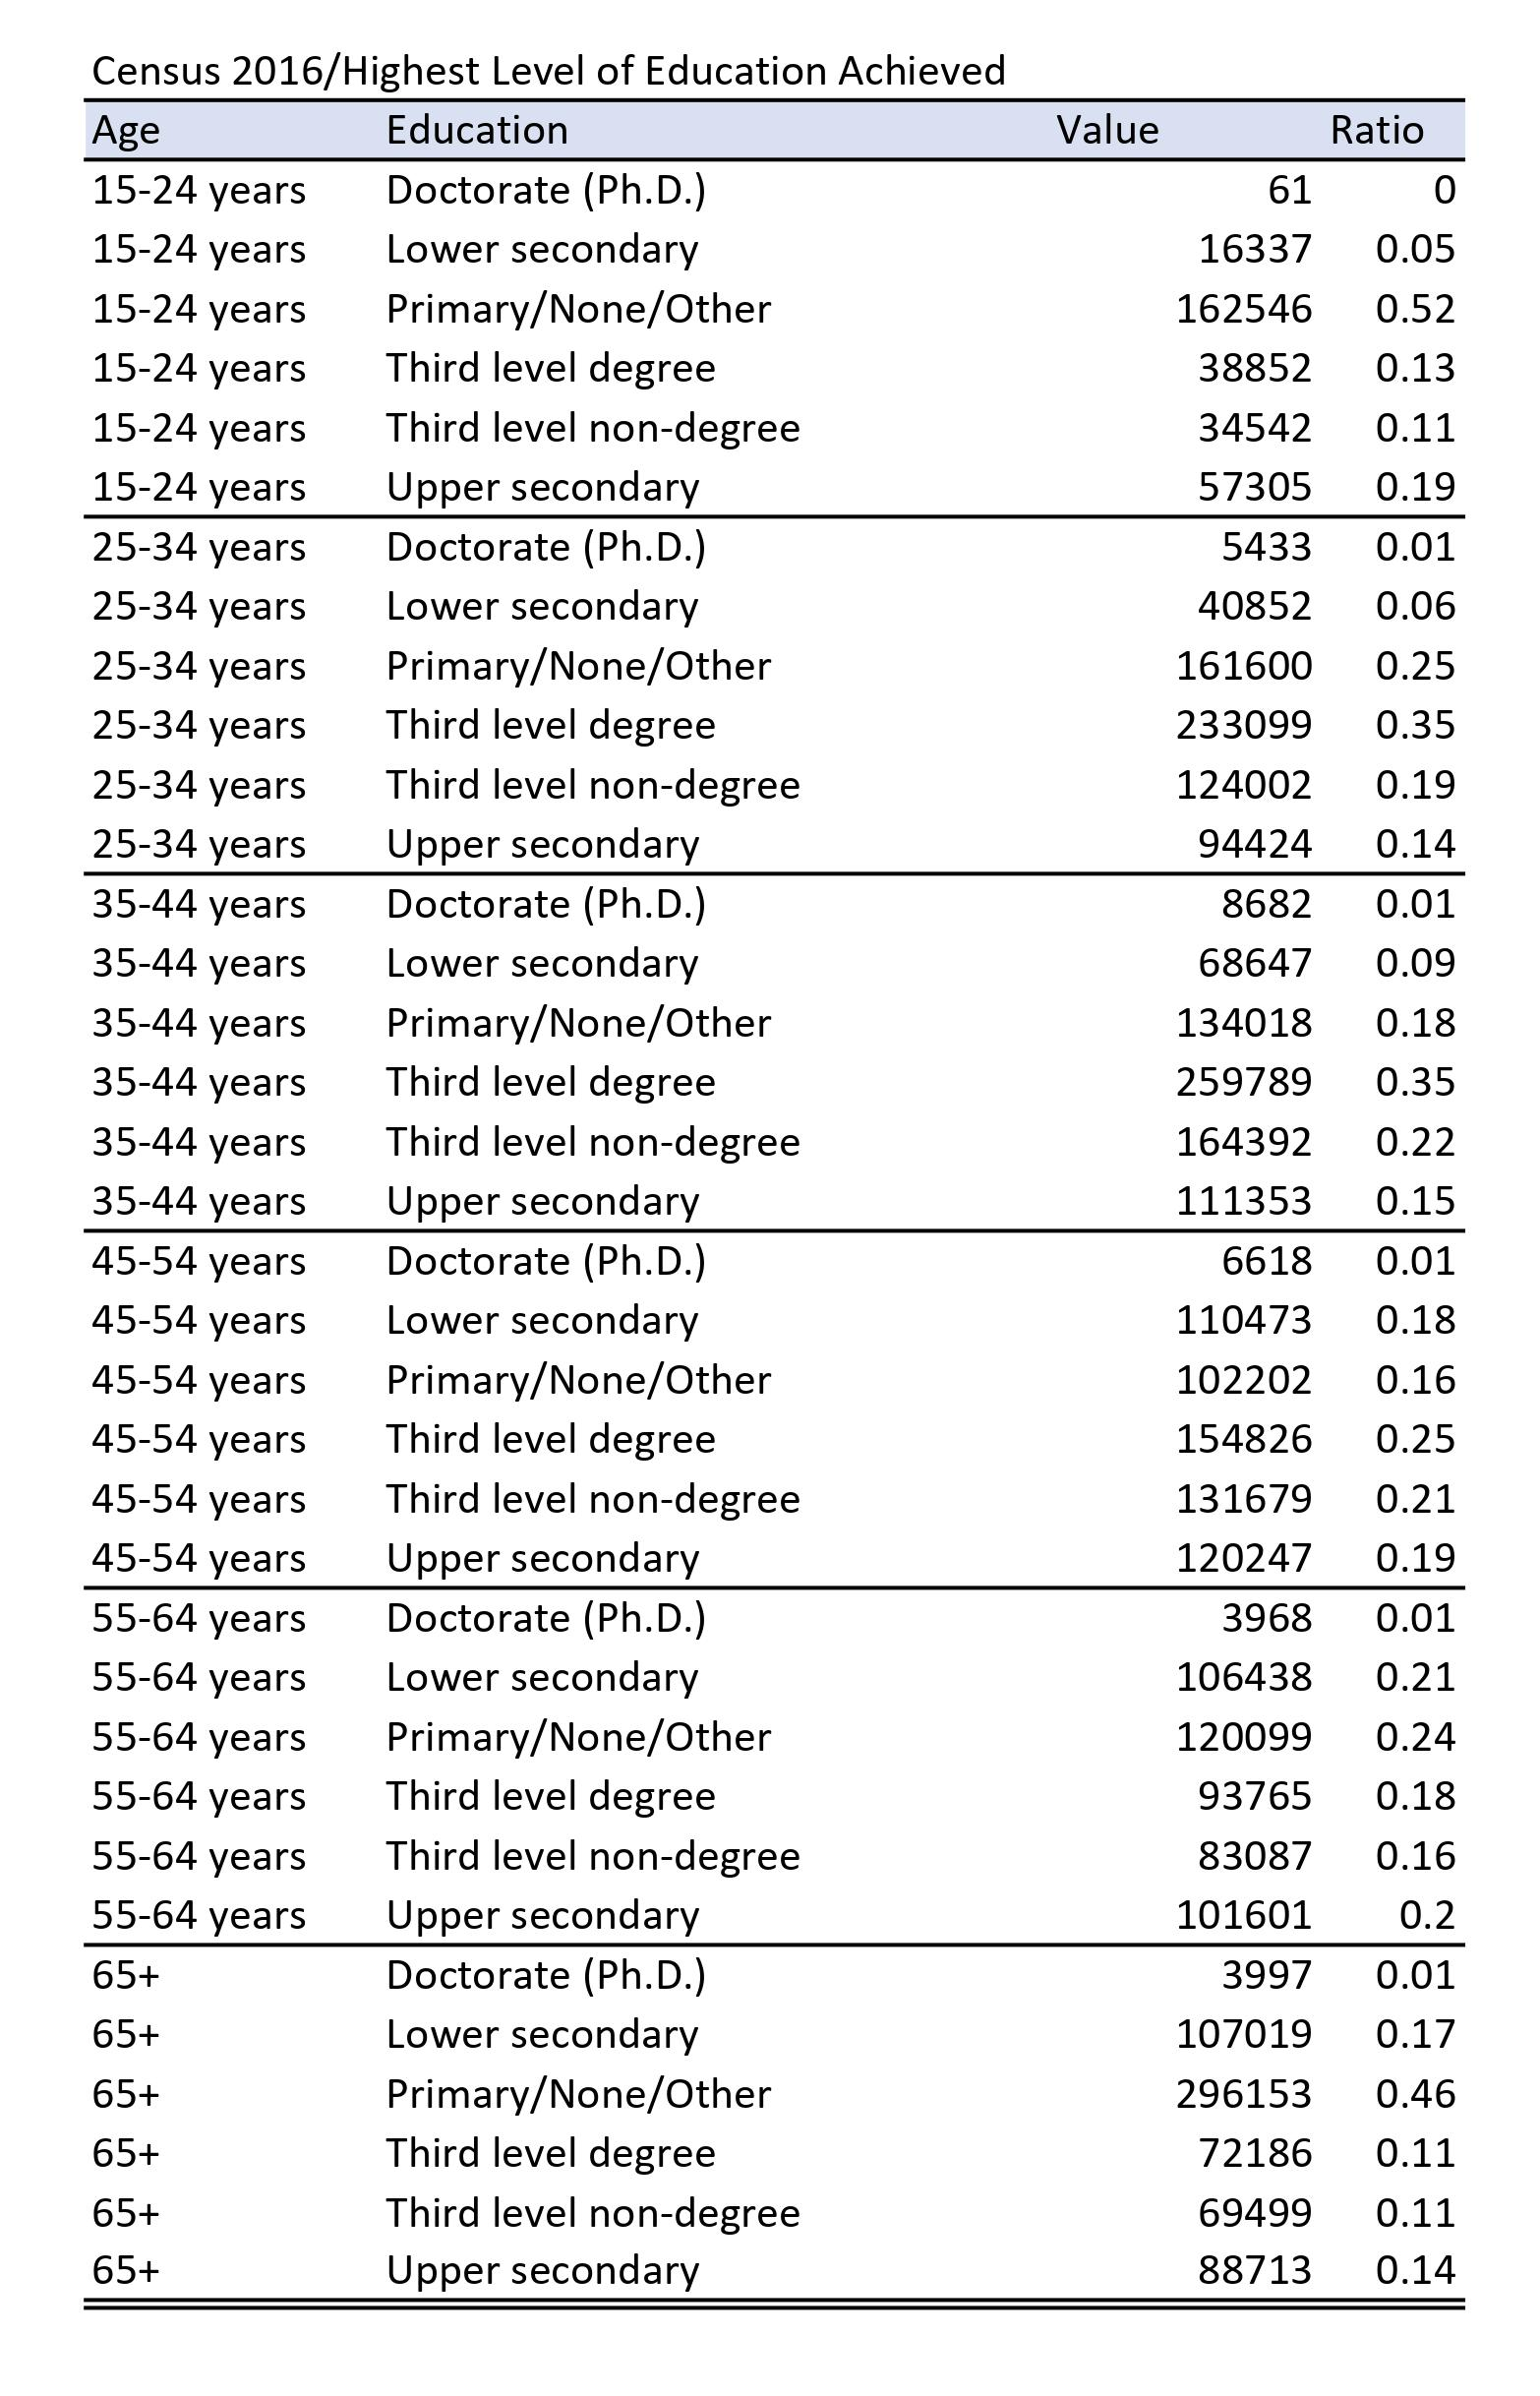
</div>


## 4. Coding the Dataset  <a class="anchor" id="dataset"></a>

In [9]:
# overall dataframe categories
df = pd.DataFrame(columns=['Age', 'Age_brackets','Smoker', 'Social_Class', 'Education'])

# set the seed, a nod to Douglas Adams and the ASCII code for the symbol *
np.random.seed(42)

# dataframe for age
df['Age'] = ((arr1+arr2))

# Create a list of age bins
age_groups = ['15-24', '25-34', '35-44', '45-54', '55-64', '65+']

# set the parameters and np.inf so it captures all remaining ages
evaluation_bins = [15, 24, 34, 44, 54, 64, np.inf]

# collect ages into the age_brackets
df['Age_brackets'] = pd.cut(df['Age'], bins=evaluation_bins, labels=age_groups, include_lowest=True, right=False)

# dataframe for smokers
smokers = ['Yes', 'No']  #Create the smoker/ non-smoker

# function to assign smoker based on gender and age probabilities
def smoker(smoke):
    if smoke == '15-24':
        return np.random.choice(smokers, p=[0.15, 0.85])
    if smoke == '25-34':
        return np.random.choice(smokers, p=[0.20, 0.80])
    if smoke == '35-44':
        return np.random.choice(smokers, p=[0.21, 0.79])
    if smoke == '45-54':
        return np.random.choice(smokers, p=[0.24, 0.76])
    if smoke == '55-64':
        return np.random.choice(smokers, p=[0.19, 0.81])
    if smoke == '65+':
        return np.random.choice(smokers, p=[0.10, 0.90])
    
    
df['Smoker'] = df['Age_brackets'].apply(smoker)

# dataframe for social class
classes = ['Professional_Workers', 'Managerial_Technical', 'Non_Manual', 'Skilled_Manual', 'Semiskilled', 'Unskilled', 'Other']
df['Social_Class'] = np.random.choice(classes, size=1000, p=[0.081, 0.281, 0.176, 0.141, 0.105, 0.036, 0.180], replace=True)

# dataframe for education
education = ['Primary/None/Other', 'Lower Secondary', 'Upper Secondary', 'Third Level - Non-Degree', 'Third Level Degree', 'Doctorate']

def levels(age):
    if age == '15-24':
        return np.random.choice(education, p=[0.52, 0.05, 0.19, 0.11, 0.13, 0.0])
    if age == '25-34':
        return np.random.choice(education, p=[0.25, 0.06, 0.14, 0.19, 0.35, 0.01])
    if age == '35-44':
        return np.random.choice(education, p=[0.18, 0.09, 0.15, 0.22, 0.35, 0.01])
    if age == '45-54':
        return np.random.choice(education, p=[0.16, 0.18, 0.19, 0.21, 0.25, 0.01])
    if age == '55-64':
        return np.random.choice(education, p=[0.24, 0.21, 0.2, 0.16, 0.18, 0.01])
    if age == '65+':
        return np.random.choice(education, p=[0.46, 0.17, 0.14, 0.11, 0.11, 0.01])
    
df['Education'] = df['Age_brackets'].apply(levels)

df

,Age,Age_brackets,Smoker,Social_Class,Education
0,57,55-64,Yes,Professional_Workers,Primary/None/Other
1,93,65+,No,Other,Third Level Degree
2,79,65+,No,Skilled_Manual,Third Level Degree
3,100,65+,No,Semiskilled,Third Level Degree
4,83,65+,No,Professional_Workers,Third Level Degree
...,...,...,...,...,...
995,69,65+,No,Skilled_Manual,Third Level Degree
996,63,55-64,Yes,Other,Primary/None/Other
997,71,65+,No,Semiskilled,Third Level Degree
998,52,45-54,No,Unskilled,Upper Secondary


In [10]:
df['Smoker'].value_counts()

No     812
Yes    188
Name: Smoker, dtype: int64

## 5. Testing the Dataset  <a class="anchor" id="testing"></a>

## 6. Conclusion  <a class="anchor" id="conclusion"></a>

## 7. References  <a class="anchor" id="references"></a>

https://datagen.tech/guides/synthetic-data/synthetic-data/ - visited on 07/11/2022

video : https://www.youtube.com/watch?v=uG_YMEcyaA8 – watched 07/11/2022

Advantages and disadvantages of synthetic data - https://www.dataversity.net/the-pros-and-cons-of-synthetic-data/ - visited 09/11/2022

https://www.hse.ie/eng/about/who/tobaccocontrol/research/smoking-in-ireland-2021.pdf - visited 09/11/2022

https://www.cso.ie/en/media/csoie/newsevents/documents/census2016summaryresultspart2/Chapter_6_Socio-economic_group_and_social_class.pdf visited 15/11/2022

Assigning age bins - https://stackoverflow.com/questions/71564603/pandas-cut-and-specifying-specific-bin-sizes - visited 17/11/2022

Pandas: analysing dataframes - https://www.w3schools.com/python/pandas/pandas_analyzing.asp - visited 18/11/2022

Lung cancer information and statistics - https://www.mariekeating.ie/cancer-information/lung-cancer/ - visited 18/11/2022

The Association Between Education and Smoking Prevalence, Independent of Occupation: A Nationally Representative Survey in Japan - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7025916/#:~:text=With%20respect%20to%20the%20association,current%20smoking%20in%20those%20individuals. - visited 18/11/2022

